In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from yellowbrick.cluster import SilhouetteVisualizer

In [4]:
df = pd.read_excel('cust_data.xlsx')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
df.shape

(30000, 38)

In [6]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [8]:
df['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

In [9]:
df['Gender'] = df['Gender'].fillna('F')
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [12]:
df.duplicated().sum()

0

In [13]:
df.iloc[:,3:].sample(20)

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
413,0,1,5,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1810,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
17300,0,0,0,0,0,1,0,0,0,0,...,0,2,1,0,1,0,0,1,0,0
2633,0,2,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,2,0,0,1
24544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23229,0,0,0,0,4,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
13510,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,2,0,0,0
14462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1392,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
df.describe(percentiles=[0.01,0.02,0.03,0.05]).T

,count,mean,std,min,1%,2%,3%,5%,50%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,300.99,600.98,900.97,1500.95,15000.5,30000.0
Orders,30000.0,4.169800,3.590311,0.0,0.00,0.00,0.00,0.00,4.0,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.00,0.00,0.00,0.00,0.0,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.00,0.00,0.00,0.00,0.0,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.00,0.00,0.00,0.00,0.0,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.00,0.00,0.00,0.00,0.0,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.00,0.00,0.00,0.00,0.0,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.00,0.00,0.00,0.00,0.0,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.00,0.00,0.00,0.00,0.0,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.00,0.00,0.00,0.00,0.0,16.0


In [15]:
df.describe(percentiles=[0.95,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,97%,98%,99%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,15000.5,28500.05,29100.03,29400.02,29700.01,30000.0
Orders,30000.0,4.169800,3.590311,0.0,4.0,10.00,11.00,11.00,12.00,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.0,2.00,2.00,3.00,4.00,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.0,2.00,2.00,2.00,3.00,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.0,1.00,2.00,3.00,5.00,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.0,1.00,2.00,2.00,4.00,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.0,1.00,1.00,2.00,3.00,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.0,1.00,1.00,2.00,2.00,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.0,1.00,1.00,2.00,3.00,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.0,1.00,1.00,2.00,2.00,16.0


In [19]:
df.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [20]:
x = df.iloc[:,2:]
print(x.columns)

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')


In [22]:
from sklearn.cluster import KMeans

WCSS
 [918493.4415000014, 616586.8209608577, 568242.790397475, 543064.1059290527, 525140.8252117403, 507191.2414940137, 492527.9226733185, 480063.7448908865, 469329.183115065, 460461.49683735124, 455816.9896214816]


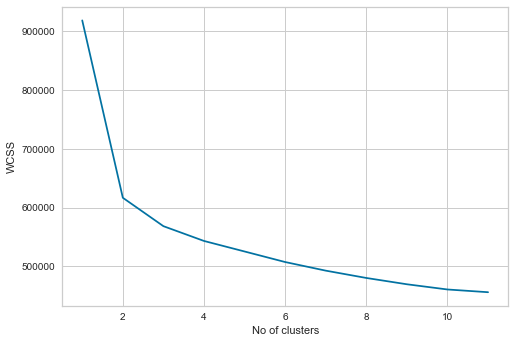

In [24]:
# wcss = within cluster sum of square
wcss = []
for i in range(1,12): # i = no of clusters,
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,12)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
for i in range(2,12): # i = no of clusters
    m = KMeans(n_clusters=i).fit(x)
    print(f'Silhoutte Score at K={i}',silhouette_score(x, m.labels_))

Silhoutte Score at K=2 0.33837516300865234
Silhoutte Score at K=3 0.20313881710635542
Silhoutte Score at K=4 0.20201942541013979
Silhoutte Score at K=5 0.20470409307463347
Silhoutte Score at K=6 0.13200213854473847
Silhoutte Score at K=7 0.13274235884359062
Silhoutte Score at K=8 0.15282023215952614
Silhoutte Score at K=9 0.1284088586934876
Silhoutte Score at K=10 0.1496035198453895
Silhoutte Score at K=11 0.12709934262726244


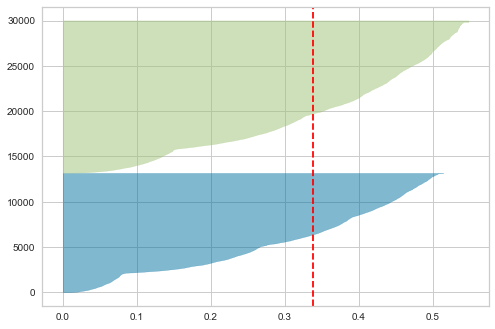

In [27]:
m2 = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(m2, colors='yellowbrick')
visualizer.fit(x) 
plt.show()

#### Optimal Number of Clusters = 2

### Applying KMeans at K=2

In [28]:
k2 = KMeans(n_clusters=2)
k2.fit(x)
ypred2 = k2.predict(x)
print(ypred2)

[1 0 1 ... 0 0 0]


In [29]:
cent2 = k2.cluster_centers_
print(cent2)

[[1.36271771 0.25756405 0.23491648 0.21119895 0.1515782  0.13903584
  0.13600428 0.1056292  0.1075908  0.09790168 0.13642038 0.30743625
  0.21440885 0.13564763 0.15692802 0.10794745 0.28330262 0.04559234
  0.72614872 0.2422279  0.46822802 0.25209535 0.1154372  0.0341794
  0.41675088 0.11834988 0.10705582 0.26624264 0.35790287 0.15740355
  0.07769126 0.05861024 0.19021578 0.111514   0.08595375 0.07358973]
 [7.75358579 0.28003339 0.27456933 0.23791455 0.17378766 0.14927525
  0.14457008 0.10859832 0.11633908 0.08962586 0.14487364 0.35470896
  0.20285346 0.1488958  0.16642635 0.10374137 0.32184868 0.05122562
  0.79137892 0.25514153 0.47415952 0.26553844 0.12301738 0.02914169
  0.44243758 0.12514229 0.09675951 0.27737725 0.38559611 0.16096228
  0.07763527 0.05570312 0.19473325 0.12256204 0.09068832 0.06746604]]


In [30]:
df['Cls2'] = ypred2

In [32]:
res = df.iloc[:,2:].groupby('Cls2').mean()
res.T

Cls2,0,1
Orders,1.362718,7.753586
Jordan,0.257564,0.280033
Gatorade,0.234916,0.274569
Samsung,0.211199,0.237915
Asus,0.151578,0.173788
Udis,0.139036,0.149275
Mondelez International,0.136004,0.144570
Wrangler,0.105629,0.108598
Vans,0.107591,0.116339
Fila,0.097902,0.089626
